## TP Data Mining

Dataset: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset

1. Organización y Contexto del Negocio
    - Organización: Una tienda minorista ficticia que vende una amplia gama de productos.
    - Contexto del Negocio: La tienda quiere comprender mejor el comportamiento y las preferencias de sus clientes para optimizar sus estrategias de marketing, mejorar la experiencia del cliente y aumentar las ventas.
2. Necesidad o Problema a Resolver:
    - La tienda necesita identificar patrones en el comportamiento de compra de los clientes.
    - Problemas específicos a resolver:
        - ¿Cuáles son los productos más populares y en qué temporadas se compran más?
        - ¿Qué métodos de pago prefieren los clientes?
        - ¿Cómo afectan los descuentos y los códigos promocionales a las compras?
        - ¿Existen grupos de clientes con comportamientos similares (clustering)?
3. Modelos de Datos Existentes
4. Análisis Exploratorio de Datos (EDA)
5. Decisiones de Diseño
    - Modelo de Datos: Utilizar un modelo tabular con las variables presentadas.
    - Tecnología: Usar Python con bibliotecas como Pandas, Scikit-learn y Seaborn para el análisis.
    - ETL (Extracción, Transformación y Carga): Procesar el dataset para limpieza de datos y transformación (codificación de variables categóricas, manejo de valores nulos, etc.).
6. Aplicación de Métodos de Data Mining: Clustering
    - Objetivo: Identificar grupos de clientes con comportamientos similares.
    - Método: K-means clustering.

### 3. Modelos de Datos Existentes
| Variable | Descripción |
| ----------- | ----------- |
| Customer ID | Entero, clave primaria |
| Age | Entero |
| Item Purchased | Texto |
| Category | Texto |
| Purchase Amount (USD) | Flotante |
| Location | Texto |
| Size | Texto |
| Color | Texto |
| Season | Categórico (e.g., Winter, Spring, Summer, Fall) |
| Review Rating | Entero (1 a 5) |
| Subscription Status | Categórico (Yes/No) |
| Shipping Type | Texto (e.g., Standard, Express) |
| Discount Applied | Categórico (Yes/No) |
| Promo Code Used | Categórico (Yes/No) |
| Previous Purchases | Entero |
| Payment Method | Categórico (e.g., Credit Card, Debit Card, PayPal) |

### 4. Análisis Exploratorio de Datos (EDA)

In [1]:
# Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
# Cargamos el dataset y vemos los primeros registros
df = pd.read_csv('data.csv', index_col=0)
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method
Customer ID,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal


In [5]:
# Vemos una descripción estadística de los datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3900.0,44.068462,15.207589,18.0,31.0,44.0,57.0,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.0,60.0,81.0,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.1,3.7,4.4,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.0,25.0,38.0,50.0


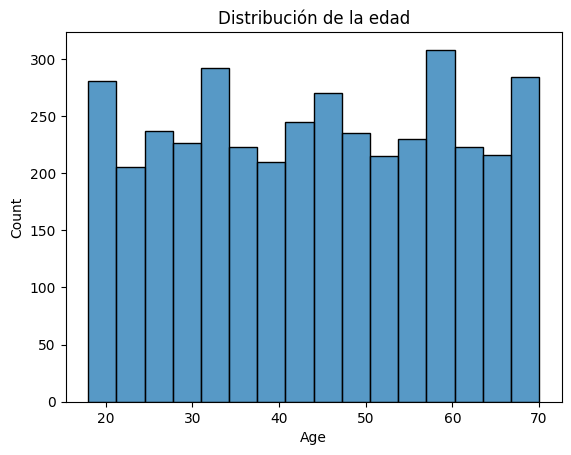

In [9]:
# Vemos la distribución de la edad
sns.histplot(df['Age'])
plt.title('Distribución de la edad')
plt.show()

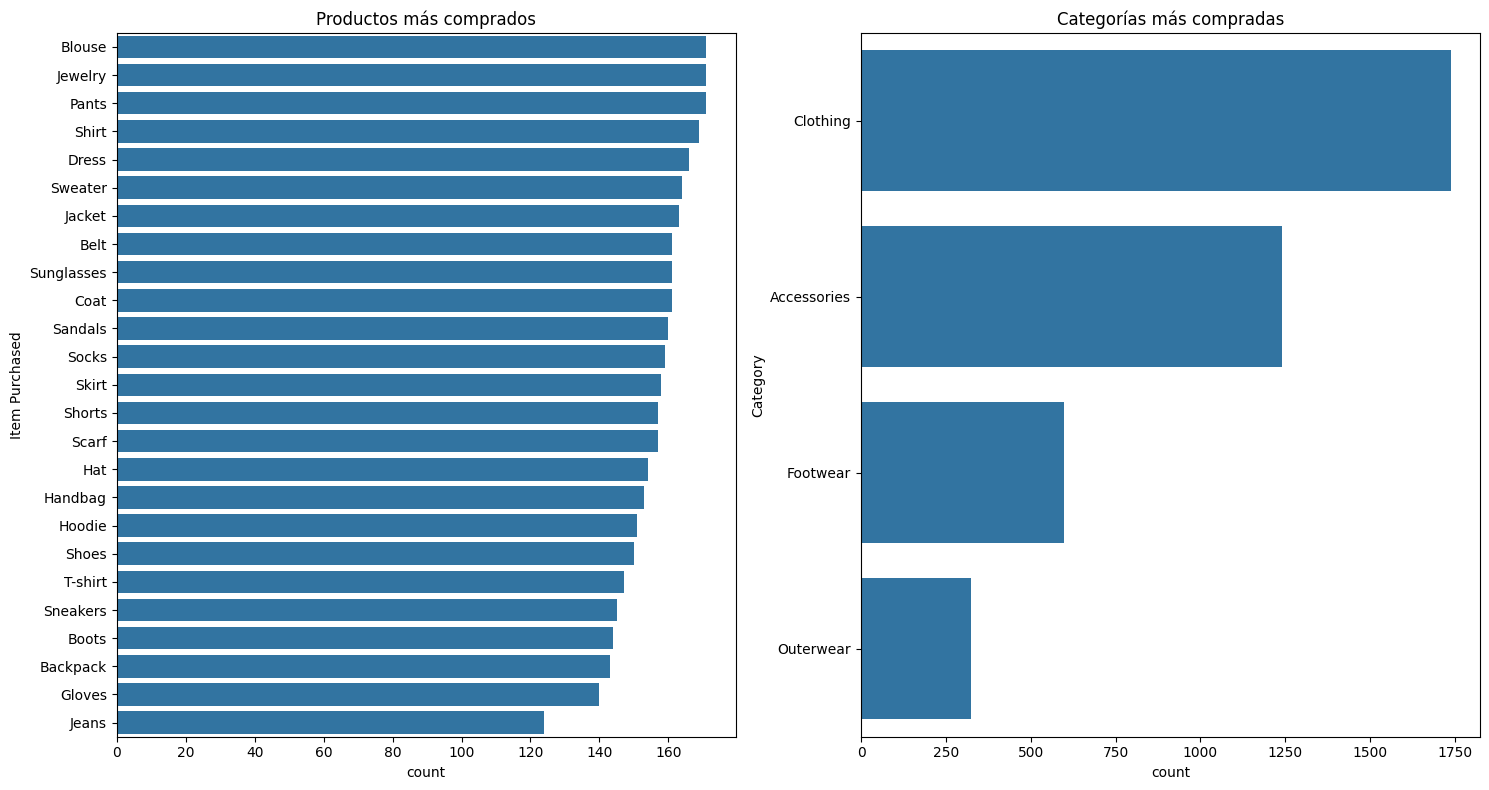

In [7]:
# Vemos los productos y las categorías más compradas
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

sns.countplot(data=df, y='Item Purchased', order=df['Item Purchased'].value_counts().index, ax=axes[0])
axes[0].set_title('Productos más comprados')

sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index, ax=axes[1])
axes[1].set_title('Categorías más compradas')

plt.tight_layout()
plt.show()

### 6. Aplicación de Métodos de Data Mining: Clustering

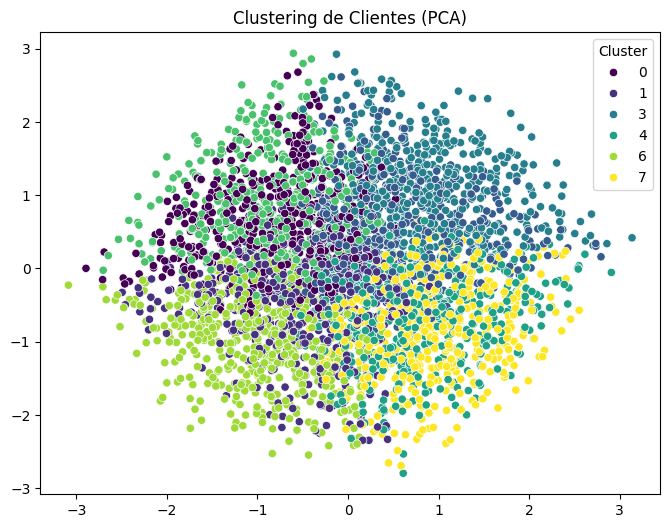

               Age  Purchase Amount (USD)  Review Rating  Previous Purchases
Cluster                                                                     
0        56.248963              40.782158       4.250830           37.221992
1        32.882000              43.774000       3.167200           36.678000
2        55.211382              77.973577       4.302033           13.841463
3        32.374741              79.329193       4.363768           36.612836
4        32.179381              77.443299       3.185773           13.012371
5        56.653422              81.143488       3.267329           36.598234
6        56.614286              40.971429       3.140816           16.226531
7        32.040777              39.735922       4.279223           14.089320


In [8]:
# Seleccionar variables para clustering
clustering_data = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']]

# Estandarizar los datos
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Clustering con K-Means
kmeans = KMeans(n_clusters=8, random_state=42)
df['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Visualización de clusters en el espacio reducido por PCA
pca = PCA(n_components=2)
clustering_data_pca = pca.fit_transform(clustering_data_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=clustering_data_pca[:, 0], y=clustering_data_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Clustering de Clientes (PCA)')
plt.legend(title='Cluster')
plt.show()

# Análisis de características de los clústeres
cluster_means = df.groupby('Cluster')[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']].mean()
print(cluster_means)

En base a los datos obtenidos en K-means clustering, se identificaron 8 clusters de clientes con comportamientos similares. A continuación, se presenta una descripción de cada cluster y una estrategia de marketing recomendada para cada uno:

| Cluster | Descripción | Estrategia de Marketing |
| ------- | ----------- | ----------------------- |
| 0 | Clientes mayores con compras moderadas y alta lealtad. Están satisfechos con sus compras (alta calificación de reseñas). | Implementar programas de fidelización, ofrecer descuentos personalizados y promociones exclusivas para mantener su lealtad. |
| 1 | Clientes jóvenes con compras moderadas y alta lealtad. Aunque compran moderadamente, están comprometidos con la tienda. | Dirigir campañas en redes sociales, promociones de referidos para atraer a más clientes similares y mejorar la experiencia de compra online. |
| 2 | Clientes mayores con compras altas y baja lealtad. Están dispuestos a gastar más pero no compran frecuentemente. | Ofrecer incentivos de recompra, promociones en productos de mayor valor y mejorar la experiencia de cliente para aumentar la lealtad. |
| 3 | Clientes jóvenes con compras altas y alta lealtad. Compran productos de alta gama y están muy satisfechos. | Ofrecer productos premium exclusivos, promociones en nuevos lanzamientos y organizar eventos especiales. |
| 4 | Clientes jóvenes con compras altas y baja lealtad. Aunque gastan mucho, no compran frecuentemente. | Implementar programas de recompra, ofrecer descuentos iniciales atractivos y campañas publicitarias dirigidas para aumentar la frecuencia de compras. |
| 5 | Clientes mayores con compras altas y alta lealtad. Gastan mucho y son leales. | Ofrecer descuentos exclusivos por fidelidad, programas de recompensas y comunicaciones personalizadas para mantener su lealtad. |
| 6 | Clientes mayores con compras moderadas y baja lealtad. No compran con frecuencia y sus gastos son moderados. | Ofrecer ofertas atractivas para aumentar la lealtad, implementar programas de fidelización y ofrecer incentivos por recompra. |
| 7 | Clientes jóvenes con compras moderadas y baja lealtad. Compran poco y no frecuentemente. | Implementar campañas de marketing en redes sociales, ofrecer incentivos por primera compra y mejorar la experiencia de compra online para aumentar la lealtad. |

### Conclusion
Al analizar los clústeres, se pueden identificar diferentes segmentos de clientes con comportamientos distintos. Adaptar las estrategias de marketing según las características y necesidades de cada grupo ayudará a optimizar las campañas y mejorar la retención y satisfacción del cliente.